# < 빅데이터 플렛폼 테스트>

#TITANIC

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgbm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.preprocessing import LabelEncoder

1번 문제 [하] 데이터에 결측치가 있다면, 4가지 이상 방법을 사용한 후 검증하시오.
--

데이터 내에 결측치가 있다면, 4가지 이상의 방법을 적용하여서 검증해보세요.
--

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- 결측치가 Age, Cabin, Embarked에 있다.



In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- 결측치가 Age, Fare, Cabin에 있다.

In [ ]:
gender_submission.isna().sum()

PassengerId    0
Survived       0
dtype: int64

- 결측치가 없다.

In [ ]:
train.info(), test.info(), gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None, None)

In [ ]:
le=LabelEncoder()

le.fit(train.Name)
train.Name=le.fit_transform(train.Name)

In [ ]:
le.fit(test.Name)
test.Name=le.fit_transform(test.Name)

In [ ]:
le.fit(train.Sex)
train.Sex=le.fit_transform(train.Sex)

In [ ]:
le.fit(test.Sex)
test.Sex=le.fit_transform(test.Sex)

In [ ]:
le.fit(train.Ticket)
train.Ticket=le.fit_transform(train.Ticket)

In [ ]:
le.fit(test.Ticket)
test.Ticket=le.fit_transform(test.Ticket)

결측치를 어떻게 채워줄까?
--

Age       

train: 177, test: 86

Fare          

train:0, test:1

Cabin          

train: 687, test:327

Embarked        

train: 2, test: 0


In [ ]:
len(train.index)

891

In [ ]:
len(test.index)

418

dropna를 통해 결측치를 제거해주면 train과 test 인덱스 개수가 절반 이상 날라간다.

첫 번째 방법: 결측치 0, NaN으로 채워주기
--

In [ ]:
df_tn=train.copy()
df_te=test.copy()

In [ ]:
df_tn.info(),
print('\n')
df_tn.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치가 있는 Cabin의 경우, 결측치가 너무 많으므로, 결측치를 NaN으로 string형식으로 해준뒤, 라벨 인코딩 실시

In [ ]:
df_tn.Cabin=df_tn.Cabin.fillna('NaN')

In [ ]:
df_te.Cabin=df_te.Cabin.fillna('NaN')

In [ ]:
le.fit(df_tn.Cabin)
df_tn.Cabin=le.fit_transform(df_tn.Cabin)

le.fit(df_te.Cabin)
df_te.Cabin=le.fit_transform(df_te.Cabin)

In [ ]:
df_tn.Embarked=df_tn.Embarked.fillna('NaN')
df_te.Embarked=df_te.Embarked.fillna('NaN')

In [ ]:
le.fit(df_tn.Embarked)
df_tn.Embarked=le.fit_transform(df_tn.Embarked)

le.fit(df_te.Embarked)
df_te.Embarked=le.fit_transform(df_te.Embarked)

In [ ]:
df_tn.isna().sum(),df_te.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin            0
 Embarked         0
 dtype: int64, PassengerId     0
 Pclass          0
 Name            0
 Sex             0
 Age            86
 SibSp           0
 Parch           0
 Ticket          0
 Fare            1
 Cabin           0
 Embarked        0
 dtype: int64)

- Age, Fare 0으로 결측치 채워주기

In [ ]:
df_tn.Age=df_tn.Age.fillna(0)

In [ ]:
df_te.Age=df_te.Age.fillna(0)

In [ ]:
df_te.Fare=df_te.Fare.fillna(0)

- 검증해보기

In [ ]:
x=df_tn.drop(['Survived'], axis=1)
y=df_tn['Survived']

In [ ]:
# 변수들에 상수항을 추가함
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()                

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     50.91
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.86e-86
Time:                        06:26:07   Log-Likelihood:                -402.38
No. Observations:                 891   AIC:                             828.8
Df Residuals:                     879   BIC:                             886.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2539      0.083     15.143      0.000       1.091       1.416
PassengerId  3.919e-06   5.01e-05      0.078      0.938   -9.45e-05       0.000
Pclass         -0.1365      0.024     -5.575      0.000      -0.185      -0.088
Name         -7.29e-05   5.02e-05     -1.453      0.147      -0.000    2.56e-05
Sex            -0.5145      0.028    -18.224      0.000      -0.570      -0.459
Age            -0.0025      0.001     -3.148      0.002      -0.004      -0.001
SibSp          -0.0365      0.013     -2.757      0.006      -0.062      -0.011
Parch          -0.0104      0.018     -0.567      0.571      -0.046       0.026
Ticket         -0.0001   6.96e-05     -1.810      0.071      -0.000    1.06e-05
Fare            0.0004      0.000      1.201      0.230      -0.000       0.001
Cabin          -0.0002      0.001     -0.455      0.649      -0.001       0.001
Embarked       -0.0206      0.012     -1.764      0.078      -0.043       0.002
==============================================================================
Omnibus:                       40.210   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.620
Skew:                           0.544   Prob(JB):                     2.05e-10
Kurtosis:                       3.135   Cond. No.                     4.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

두 번째 방법:   평균치 , NaN으로 채워주기
--

object type은 string type으로 NaN 값으로 결측치를 쓴 다음, 라벨인코더로 바꿔주도록 한다.

In [ ]:
df_tn=train.copy()
df_te=test.copy()

In [ ]:
df_tn.Cabin=df_tn.Cabin.fillna('NaN')
df_te.Cabin=df_te.Cabin.fillna('NaN')

In [ ]:
le.fit(df_tn.Cabin)
df_tn.Cabin=le.fit_transform(df_tn.Cabin)

le.fit(df_te.Cabin)
df_te.Cabin=le.fit_transform(df_te.Cabin)

In [ ]:
df_tn.Embarked=df_tn.Embarked.fillna('NaN')
df_te.Embarked=df_te.Embarked.fillna('NaN')

In [ ]:
le.fit(df_tn.Embarked)
df_tn.Embarked=le.fit_transform(df_tn.Embarked)

le.fit(df_te.Embarked)
df_te.Embarked=le.fit_transform(df_te.Embarked)

- Age, Fare 평균값으로 결측치 채워주기

In [ ]:
tn_age_avg=df_tn.Age.mean()

In [ ]:
df_tn.Age=df_tn.Age.fillna(tn_age_avg)

In [ ]:
te_age_avg=df_te.Age.mean()

In [ ]:
df_te.Age=df_te.Age.fillna(te_age_avg)

In [ ]:
te_fare_avg=df_te.Fare.mean()

In [ ]:
df_te.Fare=df_te.Fare.fillna(te_fare_avg)

검증해보기

In [ ]:
x=df_tn.drop(['Survived'], axis=1)
y=df_tn['Survived']

In [ ]:
# 변수들에 상수항을 추가함
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     53.47
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.24e-90
Time:                        06:26:17   Log-Likelihood:                -393.74
No. Observations:                 891   AIC:                             811.5
Df Residuals:                     879   BIC:                             869.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3840      0.088     15.810      0.000       1.212       1.556
PassengerId  5.421e-06   4.96e-05      0.109      0.913    -9.2e-05       0.000
Pclass         -0.1462      0.024     -6.082      0.000      -0.193      -0.099
Name        -4.384e-05   4.97e-05     -0.882      0.378      -0.000    5.37e-05
Sex            -0.5067      0.028    -18.081      0.000      -0.562      -0.452
Age            -0.0056      0.001     -5.226      0.000      -0.008      -0.004
SibSp          -0.0400      0.013     -3.059      0.002      -0.066      -0.014
Parch          -0.0195      0.018     -1.075      0.283      -0.055       0.016
Ticket         -0.0001   6.88e-05     -1.741      0.082      -0.000    1.53e-05
Fare            0.0004      0.000      1.068      0.286      -0.000       0.001
Cabin          -0.0003      0.001     -0.584      0.559      -0.001       0.001
Embarked       -0.0233      0.011     -2.032      0.042      -0.046      -0.001
==============================================================================
Omnibus:                       37.064   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.701
Skew:                           0.519   Prob(JB):                     1.45e-09
Kurtosis:                       3.141   Cond. No.                     5.31e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

세 번째 방법: 최빈값, NaN으로 채워주기
--

object type은 string type으로 NaN 값으로 결측치를 쓴 다음, 라벨인코더로 바꿔주도록 한다.

In [ ]:
df_tn=train.copy()
df_te=test.copy()

In [ ]:
df_tn.Cabin=df_tn.Cabin.fillna('NaN')
df_te.Cabin=df_te.Cabin.fillna('NaN')

In [ ]:
le.fit(df_tn.Cabin)
df_tn.Cabin=le.fit_transform(df_tn.Cabin)

le.fit(df_te.Cabin)
df_te.Cabin=le.fit_transform(df_te.Cabin)

In [ ]:
df_tn.Embarked=df_tn.Embarked.fillna('NaN')
df_te.Embarked=df_te.Embarked.fillna('NaN')

In [ ]:
le.fit(df_tn.Embarked)
df_tn.Embarked=le.fit_transform(df_tn.Embarked)

le.fit(df_te.Embarked)
df_te.Embarked=le.fit_transform(df_te.Embarked)

- Age, Fare 최빈값으로 결측치 채워주기

In [ ]:
df_tn.isna().sum(), df_te.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin            0
 Embarked         0
 dtype: int64, PassengerId     0
 Pclass          0
 Name            0
 Sex             0
 Age            86
 SibSp           0
 Parch           0
 Ticket          0
 Fare            1
 Cabin           0
 Embarked        0
 dtype: int64)

In [ ]:
from collections import Counter
def most_count(col):
    col=list(col)
    cnt=Counter(col)
    most=cnt.most_common(1)
    most=most[0][0]
    return most

In [ ]:
most_tn_age=most_count(df_tn.Age)
most_tn_age

24.0

In [ ]:
most_te_age=most_count(df_te.Age)
most_te_age

21.0

In [ ]:
most_te_fare=most_count(df_te.Fare)
most_te_fare

7.75

In [ ]:
df_tn.Age=df_tn.Age.fillna(most_tn_age)

In [ ]:
df_te.Age=df_te.Age.fillna(most_te_age)

In [ ]:
df_te.Fare=df_te.Fare.fillna(most_te_fare)

- 검증해보기

In [ ]:
x=df_tn.drop(['Survived'], axis=1)
y=df_tn['Survived']

In [ ]:
x_constant=sm.add_constant(x)

model_1=sm.OLS(y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     53.13
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.28e-89
Time:                        06:26:21   Log-Likelihood:                -394.88
No. Observations:                 891   AIC:                             813.8
Df Residuals:                     879   BIC:                             871.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3717      0.087     15.695      0.000       1.200       1.543
PassengerId  5.448e-06   4.97e-05      0.110      0.913   -9.21e-05       0.000
Pclass         -0.1476      0.024     -6.098      0.000      -0.195      -0.100
Name        -5.234e-05   4.97e-05     -1.053      0.293      -0.000    4.52e-05
Sex            -0.5078      0.028    -18.103      0.000      -0.563      -0.453
Age            -0.0054      0.001     -5.000      0.000      -0.007      -0.003
SibSp          -0.0404      0.013     -3.077      0.002      -0.066      -0.015
Parch          -0.0170      0.018     -0.937      0.349      -0.053       0.019
Ticket         -0.0001    6.9e-05     -1.715      0.087      -0.000    1.71e-05
Fare            0.0004      0.000      1.078      0.281      -0.000       0.001
Cabin          -0.0003      0.001     -0.571      0.568      -0.001       0.001
Embarked       -0.0218      0.011     -1.897      0.058      -0.044       0.001
==============================================================================
Omnibus:                       37.423   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.139
Skew:                           0.521   Prob(JB):                     1.17e-09
Kurtosis:                       3.143   Cond. No.                     5.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

네 번째 방법:  Drop, NaN으로 없애기
--

object type은 string type으로 NaN 값으로 결측치를 쓴 다음, 라벨인코더로 바꿔주도록 한다.

In [ ]:
before_tn=train.copy()
before_te=test.copy()

In [ ]:
before_tn.Cabin=before_tn.Cabin.fillna('NaN')
before_te.Cabin=before_te.Cabin.fillna('NaN')

In [ ]:
le.fit(before_tn.Cabin)
before_tn.Cabin=le.fit_transform(before_tn.Cabin)

le.fit(before_te.Cabin)
before_te.Cabin=le.fit_transform(before_te.Cabin)

In [ ]:
before_tn.Embarked=before_tn.Embarked.fillna('NaN')
before_te.Embarked=before_te.Embarked.fillna('NaN')

In [ ]:
le.fit(before_tn.Embarked)
before_tn.Embarked=le.fit_transform(before_tn.Embarked)

le.fit(before_te.Embarked)
before_te.Embarked=le.fit_transform(before_te.Embarked)

In [ ]:
le.fit(before_tn.Name)
before_tn.Name=le.fit_transform(before_tn.Name)

le.fit(before_te.Name)
before_te.Name=le.fit_transform(before_te.Name)

In [ ]:
le.fit(before_tn.Sex)
before_tn.Sex=le.fit_transform(before_tn.Sex)

le.fit(before_te.Sex)
before_te.Sex=le.fit_transform(before_te.Sex)

In [ ]:
le.fit(before_tn.Ticket)
before_tn.Ticket=le.fit_transform(before_tn.Ticket)

le.fit(before_te.Ticket)
before_te.Ticket=le.fit_transform(before_te.Ticket)

Age, Fare 결측치 행 Drop 하기

In [ ]:
before_tn.isna().sum(), before_te.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin            0
 Embarked         0
 dtype: int64, PassengerId     0
 Pclass          0
 Name            0
 Sex             0
 Age            86
 SibSp           0
 Parch           0
 Ticket          0
 Fare            1
 Cabin           0
 Embarked        0
 dtype: int64)

In [ ]:
before_tn.dropna(axis=0, inplace=True)

In [ ]:
before_te.dropna(axis=0, inplace=True)

In [ ]:
before_tn.isna().sum(), before_te.isna().sum()

(PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 dtype: int64, PassengerId    0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 dtype: int64)

In [ ]:
before_tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    int64  
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    int64  
 9   Fare         714 non-null    float64
 10  Cabin        714 non-null    int64  
 11  Embarked     714 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 72.5 KB


- 검증해보기

In [ ]:
before_x=before_tn.drop(['Survived'], axis=1)
before_y=before_tn['Survived']

In [ ]:
x_constant=sm.add_constant(before_x)

model_1=sm.OLS(before_y,x_constant)
lin_reg=model_1.fit()
lin_reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     43.57
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.58e-72
Time:                        07:37:14   Log-Likelihood:                -319.62
No. Observations:                 714   AIC:                             663.2
Df Residuals:                     702   BIC:                             718.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.4306      0.097     14.794      0.000       1.241       1.620
PassengerId  4.924e-05   5.55e-05      0.887      0.375   -5.97e-05       0.000
Pclass         -0.1753      0.028     -6.324      0.000      -0.230      -0.121
Name        -8.191e-05   6.99e-05     -1.171      0.242      -0.000    5.54e-05
Sex            -0.4863      0.031    -15.469      0.000      -0.548      -0.425
Age            -0.0063      0.001     -5.585      0.000      -0.009      -0.004
SibSp          -0.0518      0.017     -2.961      0.003      -0.086      -0.017
Parch          -0.0116      0.019     -0.608      0.543      -0.049       0.026
Ticket       -8.51e-05   9.79e-05     -0.869      0.385      -0.000       0.000
Fare            0.0002      0.000      0.601      0.548      -0.000       0.001
Cabin          -0.0002      0.001     -0.430      0.667      -0.001       0.001
Embarked       -0.0213      0.013     -1.601      0.110      -0.047       0.005
==============================================================================
Omnibus:                       25.798   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.827
Skew:                           0.482   Prob(JB):                     9.07e-07
Kurtosis:                       3.070   Cond. No.                     4.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

결측치 정리
--

평가 척도

R-squared, Adj. R-squared, AIC, BIC

첫 번째 방법: 결측치 0, NaN으로 채워주기

  0.389  0.381  828.8  886.3  

두 번째 방법: 평균치 , NaN으로 채워주기

  0.401  0.393  811.5  869.0

세 번째 방법: 최빈값, NaN으로 채워주기

0.399 0.392  813.8 871.3

네 번째 방법: Drop, NaN으로 채워주기

 0.406  0.396  663.2  718.1

 결론

 네 번째 방법이 다른 방법에 비해 R-squared, Adj. R-squared가 높고,

AIC, BIC가 낮으므로 네 번째 방법으로 결측치를 제거해준다.




2번 문제 [중] 이름에 대한 속성을 분석하시오.
--
이름에 대한 속성을 분석하고, 검증하시오.
--

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train=train.copy()
df_test=test.copy()

In [ ]:
i=0

for i in range(0,891):
    name=df_train.iloc[i, 3].split(',')[1]
    df_train.Name[i]=name.split('.')[0]
    i+=1

In [ ]:
i=0

for i in range(0,418):
    name=df_test.iloc[i, 2].split(',')[1]
    df_test.Name[i]=name.split('.')[0]
    i+=1

In [ ]:
df_train.Name.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

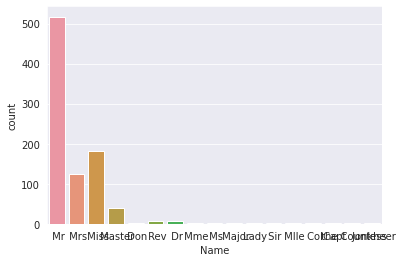

In [ ]:
sns.countplot(df_train.Name)

[Text(0, 0.5, 'Ratio'), Text(0.5, 1.0, 'name and Survived')]

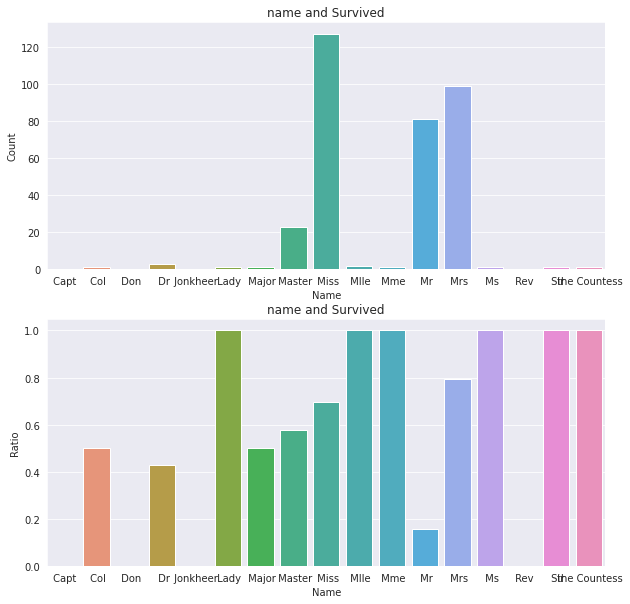

In [ ]:
figure, ((ax1),(ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(10,10)

name_survived=df_train.groupby('Name')['Survived'].sum().reset_index()

name_survived_ratio=df_train.groupby('Name')['Survived'].mean().reset_index()

sns.barplot(data=name_survived, x="Name", y='Survived', ax=ax1)
sns.barplot(data=name_survived_ratio, x="Name", y='Survived', ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='Count', title ="name and Survived")
ax2.set(ylabel='Ratio', title ="name and Survived")

대체적으로 여성이 남성에 비해 더 생존한 것으로 보여진다.

검증하고자 하는 것

라벨 인코더를 이름별로 전부 다르게 부여했을 때보다 이름의 특징별로 다르게 부여했을 때, 설명도가 더 높아질 것이다. 

In [ ]:
df_train.Cabin=df_train.Cabin.fillna('NaN')
df_test.Cabin=df_test.Cabin.fillna('NaN')

In [ ]:
le.fit(df_train.Cabin)
df_train.Cabin=le.fit_transform(df_train.Cabin)

In [ ]:
le.fit(df_test.Cabin)
df_test.Cabin=le.fit_transform(df_test.Cabin)

In [ ]:
df_train.Embarked=df_train.Embarked.fillna('NaN')
df_test.Embarked=df_test.Embarked.fillna('NaN')

In [ ]:
le.fit(df_train.Embarked)
df_train.Embarked=le.fit_transform(df_train.Embarked)

le.fit(df_test.Embarked)
df_test.Embarked=le.fit_transform(df_test.Embarked)

In [ ]:
le.fit(df_train.Name)
df_train.Name=le.fit_transform(df_train.Name)

le.fit(df_test.Name)
df_test.Name=le.fit_transform(df_test.Name)

In [ ]:
le.fit(df_train.Sex)
df_train.Sex=le.fit_transform(df_train.Sex)

le.fit(df_test.Sex)
df_test.Sex=le.fit_transform(df_test.Sex)

In [ ]:
le.fit(df_train.Ticket)
df_train.Ticket=le.fit_transform(df_train.Ticket)

le.fit(df_test.Ticket)
df_test.Ticket=le.fit_transform(df_test.Ticket)

In [ ]:
df_train.dropna(axis=0, inplace=True)

In [ ]:
df_test.dropna(axis=0, inplace=True)

In [ ]:
df_train.info(), df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    int64  
 4   Sex          714 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    int64  
 9   Fare         714 non-null    float64
 10  Cabin        714 non-null    int64  
 11  Embarked     714 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 72.5 KB


(None, PassengerId    0
 Survived       0
 Pclass         0
 Name           0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Ticket         0
 Fare           0
 Cabin          0
 Embarked       0
 dtype: int64)

최고의 모델 고르기
--

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [ ]:
!pip install mglearn

In [ ]:
!pip install catboost

In [ ]:
x=df_train.drop(['Survived'], axis=1)
y=df_train['Survived']

In [ ]:
class classification_select:
    def logistic(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        clf=LogisticRegression()
        clf.fit(x_train, y_train)
        y_pred=clf.predict(x_test)
        train_score=clf.score(x_train, y_train)
        test_score=clf.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def naviebayes(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        nb = GaussianNB()
        nb.fit(x_train, y_train)
        y_pred=nb.predict(x_test)
        train_score=nb.score(x_train, y_train)
        test_score=nb.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def decisiontree(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        dt = DecisionTreeClassifier()
        dt.fit(x_train, y_train)
        y_pred=dt.predict(x_test)
        train_score=dt.score(x_train, y_train)
        test_score=dt.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def randomforest(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        rf = RandomForestClassifier()
        rf.fit(x_train, y_train)
        y_pred=rf.predict(x_test)
        train_score=rf.score(x_train, y_train)
        test_score=rf.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def adaboost(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        ada = AdaBoostClassifier()
        ada.fit(x_train, y_train)
        y_pred=ada.predict(x_test)
        train_score=ada.score(x_train, y_train)
        test_score=ada.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def gradientboost(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         gb = GradientBoostingClassifier()
         gb.fit(x_train, y_train)
         y_pred=gb.predict(x_test)
         train_score=gb.score(x_train, y_train)
         test_score=gb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

    def xgboost(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         xgb = XGBClassifier()
         xgb.fit(x_train, y_train)
         y_pred=xgb.predict(x_test)
         train_score=xgb.score(x_train, y_train)
         test_score=xgb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         return rmse, train_score, test_score

    def lgbm(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        lgbm = LGBMClassifier()
        lgbm.fit(x_train, y_train)
        y_pred=lgbm.predict(x_test)
        train_score=lgbm.score(x_train, y_train)
        test_score=lgbm.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

    def catboost(x,y):
        x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
        cb = CatBoostClassifier()
        cb.fit(x_train, y_train)
        y_pred=cb.predict(x_test)
        train_score=cb.score(x_train, y_train)
        test_score=cb.score(x_test, y_test)
        mse=mean_squared_error(y_test, y_pred)
        rmse=np.sqrt(mse)
        return rmse, train_score, test_score

In [ ]:
class model:
    def model_choice(x,y):
        model=pd.DataFrame(columns=['모델','rmse','train_score','test_score'])
        logistic_rmse=classification_select.logistic(x,y)[0]
        logistic_train_score=classification_select.logistic(x,y)[1]
        logistic_test_score=classification_select.logistic(x,y)[2]

        model=model.append({'모델':'logistic', 'rmse':logistic_rmse,
                            'train_score':logistic_train_score,
                            'test_score':logistic_test_score}, ignore_index=True)
        
        naviebayes_rmse=classification_select.naviebayes(x,y)[0]
        naviebayes_train_score=classification_select.naviebayes(x,y)[1]
        naviebayes_test_score=classification_select.naviebayes(x,y)[2]

        model=model.append({'모델':'naviebayes', 'rmse':naviebayes_rmse,
                            'train_score':naviebayes_train_score,
                            'test_score':naviebayes_test_score}, ignore_index=True)
        
        decisiontree_rmse=classification_select.decisiontree(x,y)[0]
        decisiontree_train_score=classification_select.decisiontree(x,y)[1]
        decisiontree_test_score=classification_select.decisiontree(x,y)[2]

        model=model.append({'모델':'decisiontree', 'rmse':decisiontree_rmse,
                            'train_score':decisiontree_train_score,
                            'test_score':decisiontree_test_score}, ignore_index=True)
        
        randomforest_rmse=classification_select.randomforest(x,y)[0]
        randomforest_train_score=classification_select.randomforest(x,y)[1]
        randomforest_test_score=classification_select.randomforest(x,y)[2]
        
        model=model.append({'모델':'randomforest', 'rmse':randomforest_rmse,
                            'train_score':randomforest_train_score,
                            'test_score':randomforest_test_score}, ignore_index=True)
        
        adaboost_rmse=classification_select.adaboost(x,y)[0]
        adaboost_train_score=classification_select.adaboost(x,y)[1]
        adaboost_test_score=classification_select.adaboost(x,y)[2]

        model=model.append({'모델':'adaboost', 'rmse':adaboost_rmse,
                            'train_score':adaboost_train_score,
                            'test_score':adaboost_test_score}, ignore_index=True)
        
        gradientboost_rmse=classification_select.gradientboost(x,y)[0]
        gradientboost_train_score=classification_select.gradientboost(x,y)[1]
        gradientboost_test_score=classification_select.gradientboost(x,y)[2]

        model=model.append({'모델':'gradientboost', 'rmse': gradientboost_rmse,
                            'train_score': gradientboost_train_score,
                            'test_score': gradientboost_test_score}, ignore_index=True)
        
        xgboost_rmse=classification_select.xgboost(x,y)[0]
        xgboost_train_score=classification_select.xgboost(x,y)[1]
        xgboost_test_score=classification_select.xgboost(x,y)[2]

        model=model.append({'모델':'xgboost', 'rmse':xgboost_rmse,
                            'train_score':xgboost_train_score,
                            'test_score':xgboost_test_score}, ignore_index=True)
        
        lgbm_rmse=classification_select.lgbm(x,y)[0]
        lgbm_train_score=classification_select.lgbm(x,y)[1]
        lgbm_test_score=classification_select.lgbm(x,y)[2]

        model=model.append({'모델':'lgbm', 'rmse':lgbm_rmse,
                            'train_score':lgbm_train_score,
                            'test_score':lgbm_test_score}, ignore_index=True)
        
        catboost_rmse=classification_select.catboost(x,y)[0]
        catboost_train_score=classification_select.catboost(x,y)[1]
        catboost_test_score=classification_select.catboost(x,y)[2]

        model=model.append({'모델':'catboost', 'rmse':catboost_rmse, 
                            'train_score':catboost_train_score,
                            'test_score':catboost_test_score}, ignore_index=True)
        
        model=model.sort_values('test_score', ascending=False)

        return model

In [ ]:
best=model.model_choice(x,y)

In [ ]:
best

,모델,rmse,train_score,test_score
5,gradientboost,0.418121,0.942207,0.818182
7,lgbm,0.442498,1.000000,0.804196
8,catboost,0.442498,0.942207,0.804196
3,randomforest,0.434524,1.000000,0.790210
6,xgboost,0.458029,0.912434,0.790210
0,logistic,0.480384,0.795096,0.769231
4,adaboost,0.494727,0.872154,0.755245
1,naviebayes,0.515494,0.782837,0.734266
2,decisiontree,0.554700,1.000000,0.713287


- 모델은  gradientboost를 사용하기로 한다.

이름을 분석 전 후 비교 해보기
--

In [ ]:
class gradientboost:
    def gradientboost(x,y):
         x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
         gb = GradientBoostingClassifier()
         gb.fit(x_train, y_train)
         y_pred=gb.predict(x_test)
         train_score=gb.score(x_train, y_train)
         test_score=gb.score(x_test, y_test)
         mse=mean_squared_error(y_test, y_pred)
         rmse=np.sqrt(mse)
         print('rmse: ', rmse)
         print('train_score: ', train_score)
         print('test_score: ', test_score)
         return y_test, y_pred
    
    def auc_roc(x,y):
        y_test=gradientboost.gradientboost(x,y)[0]
        y_pred=gradientboost.gradientboost(x,y)[1]
        auc_roc=metrics.classification_report(y_test, y_pred)

        false_positive_rate, true_positive_rate, thresholds=roc_curve(y_test, y_pred)
        roc_auc=auc(false_positive_rate, true_positive_rate)

        plt.figure(figsize=(5,5))
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],linestyle='--')
        plt.axis('tight')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

이름을 범주화 해주지 않았을 때, 결과

rmse:  0.4424976788687098
train_score:  0.9404553415061296
test_score:  0.8041958041958042
rmse:  0.4345240946267408
train_score:  0.9404553415061296
test_score:  0.8111888111888111


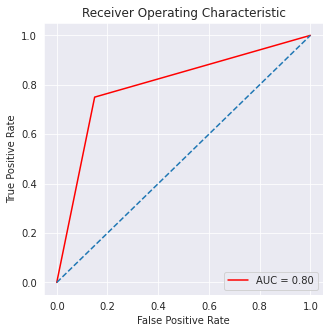

In [ ]:
gradientboost.auc_roc(before_x,before_y)

이름을 범주화 해주었을 때 결과

rmse:  0.4181210050035454
train_score:  0.9422066549912435
test_score:  0.8251748251748252
rmse:  0.4264014327112209
train_score:  0.9422066549912435
test_score:  0.8181818181818182


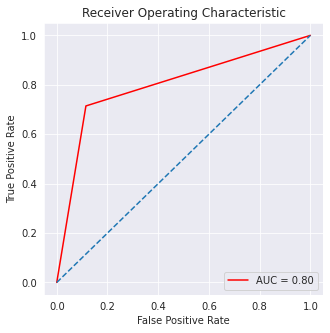

In [ ]:
gradientboost.auc_roc(x,y)

검증하고자 하는 것

라벨 인코더를 이름별로 전부 다르게 부여했을 때보다 이름의 특징별로 다르게 부여했을 때, 설명도가 더 높아질 것이다.

결과: 이름을 범주화해주지 않았을 때에 비하여, ' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'으로 범주화해주고 모델에 적용했을 때, test_score가
       0.8111888111888111에서 
       0.8181818181818182으로 올라간 것을 확인 할 수 있다.

3번 문제 [상] 나이대 별로 binning 작업을 하시오. 
--

나이대별로 binning 작업을 하여서 검증하시오.
--

In [ ]:
df_train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

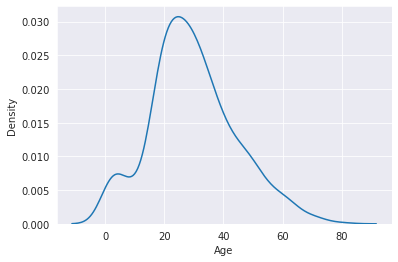

In [ ]:
sns.kdeplot(df_train.Age)

In [ ]:
df_train.iloc[:, 5]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [ ]:
df_train.Age.min(), df_train.Age.max()

(0.42, 80.0)

In [ ]:
i=0
error_list=[]

for i in range(0,714):
    age=df_train.iloc[i, 5]
    if age<20:
        if age>=10:
            df_train.iloc[i, 5]=10
        else:
            df_train.iloc[i, 5]=0
    elif age<30:
        df_train.iloc[i, 5]=20
    elif age<40:
        df_train.iloc[i, 5]=30
    elif age<50:
        df_train.iloc[i, 5]=40
    elif age<60:
        df_train.iloc[i, 5]=50
    elif age<70:
        df_train.iloc[i, 5]=60
    elif age<80:
        df_train.iloc[i, 5]=70
    elif age<90:
        df_train.iloc[i, 5]=80
    else:
        error_list.append(i)
    i+=1

In [ ]:
df_test.Age.min(), df_test.Age.max()

(0.17, 76.0)

In [ ]:
i=0
error_list=[]

for i in range(0,331):
    age=df_test.iloc[i, 4]
    if age<20:
        if age>=10:
            df_test.iloc[i, 4]=10
        else:
            df_test.iloc[i, 4]=0
    elif age<30:
        df_test.iloc[i, 4]=20
    elif age<40:
        df_test.iloc[i, 4]=30
    elif age<50:
        df_test.iloc[i, 4]=40
    elif age<60:
        df_test.iloc[i, 4]=50
    elif age<70:
        df_test.iloc[i, 4]=60
    elif age<80:
        df_test.iloc[i, 4]=70
    elif age<90:
        df_test.iloc[i, 4]=80
    else:
        error_list.append(i)
    i+=1

In [ ]:
x=df_train.drop(['Survived'], axis=1)
y=df_train['Survived']

rmse:  0.4345240946267408
train_score:  0.9369527145359019
test_score:  0.8111888111888111
rmse:  0.4345240946267408
train_score:  0.9369527145359019
test_score:  0.8111888111888111


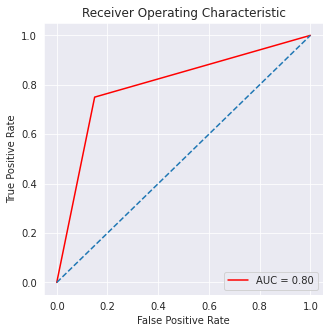

In [ ]:
gradientboost.auc_roc(x,y)

- 나이별로 비닝을 해준 이후 오히려 결과가 안 좋아진 것을 확인 할 수 있다.


4번 문제 [상] 가설을 설정하고 데이터로 검증한 결과를 코드로 첨부하시오.
--

귀무 가설: 나이대별로 성별로 숫자를 따로 부여해주면 test 점수가 떨어질 것이다.

대립 가설: 나이대별로 성별로 숫자를 따로 부여해주면 test 점수가 
떨어지지 않을 것이다.

In [ ]:
df_train['Age_sex']=0

In [ ]:
df_test['Age_sex']=0

In [ ]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_sex
0,1,0,3,11,1,20.0,1,0,523,7.2500,146,3,0
1,2,1,1,12,0,30.0,1,0,596,71.2833,81,0,0
2,3,1,3,8,0,20.0,0,0,669,7.9250,146,3,0
3,4,1,1,12,0,30.0,1,0,49,53.1000,55,3,0
4,5,0,3,11,1,30.0,0,0,472,8.0500,146,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,12,0,30.0,0,5,480,29.1250,146,2,0
886,887,0,2,14,1,20.0,0,0,101,13.0000,146,3,0
887,888,1,1,8,0,10.0,0,0,14,30.0000,30,3,0
889,890,1,1,11,1,20.0,0,0,8,30.0000,60,0,0


In [ ]:
df_train.iloc[:, 12]

0      0
1      0
2      0
3      0
4      0
      ..
885    0
886    0
887    0
889    0
890    0
Name: Age_sex, Length: 714, dtype: int64

In [ ]:
df_train.Age.min(), df_train.Age.max()

(0.0, 80.0)

In [ ]:
i=0
error_list=[]

for i in range(0,714):
    age=df_train.iloc[i, 5]
    sex=df_train.iloc[i, 4]

    if age==0.00:
        if sex==1:
            df_train.iloc[i, 12]=1
        else:
            df_train.iloc[i, 12]=0
    elif age==20.0:
        if sex==1:
            df_train.iloc[i, 12]=21
        else:
            df_train.iloc[i, 12]=20
    elif age==30.0:
        if sex==1:
            df_train.iloc[i, 12]=31
        else:
            df_train.iloc[i, 12]=30
    elif age==40.0:
        if sex==1:
            df_train.iloc[i, 12]=41
        else:
            df_train.iloc[i, 12]=40
    elif age==50.0:
        if sex==1:
            df_train.iloc[i, 12]=51
        else:
            df_train.iloc[i, 12]=50            
    elif age==60.0:
        if sex==1:
            df_train.iloc[i, 12]=61
        else:
            df_train.iloc[i, 12]=60          
    elif age==70.0:
        if sex==1:
            df_train.iloc[i, 12]=71
        else:
            df_train.iloc[i, 12]=70  
    elif age==80.0:
        if sex==1:
            df_train.iloc[i, 12]=81
        else:
            df_train.iloc[i, 12]=80 
    else:
        error_list.append(i)
    i+=1

In [ ]:
df_test.Age.min(), df_test.Age.max()

(0.0, 70.0)

In [ ]:
i=0
error_list=[]

for i in range(0,331):
    age=df_test.iloc[i, 4]
    sex=df_test.iloc[i, 3]

    if age==0.00:
        if sex==1:
            df_test.iloc[i, 11]=1
        else:
            df_test.iloc[i, 11]=0
    elif age==20.0:
        if sex==1:
            df_test.iloc[i, 11]=21
        else:
            df_test.iloc[i, 11]=20
    elif age==30.0:
        if sex==1:
            df_test.iloc[i, 11]=31
        else:
            df_test.iloc[i, 11]=30
    elif age==40.0:
        if sex==1:
            df_test.iloc[i, 11]=41
        else:
            df_test.iloc[i, 11]=40
    elif age==50.0:
        if sex==1:
            df_test.iloc[i, 11]=51
        else:
            df_test.iloc[i, 11]=50            
    elif age==60.0:
        if sex==1:
            df_test.iloc[i, 11]=61
        else:
            df_test.iloc[i, 11]=60          
    elif age==70.0:
        if sex==1:
            df_test.iloc[i, 11]=71
        else:
            df_test.iloc[i, 11]=70  
    else:
        error_list.append(i)
    i+=1

In [ ]:
x=df_train[['PassengerId', 'Pclass', 'Name','Sex', 'Age','Age_sex', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

y=df_train['Survived']

rmse:  0.4345240946267408
train_score:  0.9352014010507881
test_score:  0.8111888111888111
rmse:  0.4345240946267408
train_score:  0.9352014010507881
test_score:  0.8111888111888111


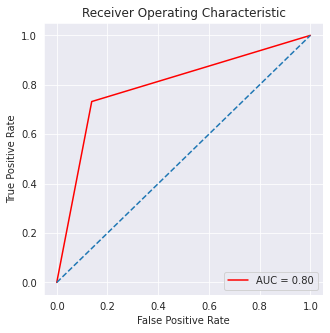

In [ ]:
gradientboost.auc_roc(x,y)

효과가 없는 것으로 판명된다.


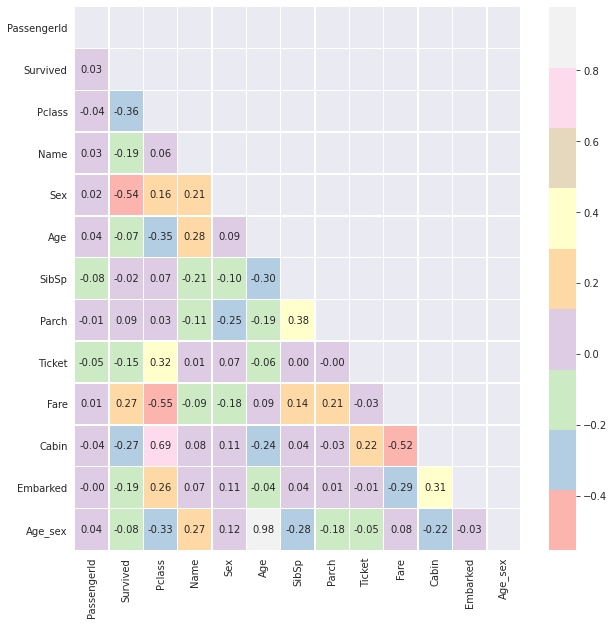

In [ ]:
import numpy as np
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(10,10))
mask = np.zeros_like(df_train.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df_train.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel1')
plt.show()

In [ ]:
#!pip install lime

In [ ]:
#!pip install shap

Shap으로 모델 해석하기
--

In [ ]:
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/shap-0.26.0-py2.7-macosx-10.9-x86_64.egg')
import shap

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred=gb.predict(x_test)
train_score=gb.score(x_train, y_train)
test_score=gb.score(x_test, y_test)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print('rmse: ', rmse)
print('train_score: ', train_score)
print('test_score: ', test_score)

rmse:  0.4345240946267408
train_score:  0.9352014010507881
test_score:  0.8111888111888111


In [ ]:
import shap

explainer = shap.TreeExplainer(gb)
shap_values = explainer.shap_values(x)

In [ ]:
shap.initjs()

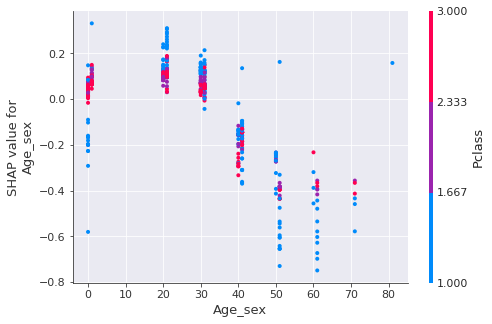

In [ ]:
shap.dependence_plot('Age_sex', shap_values, x)

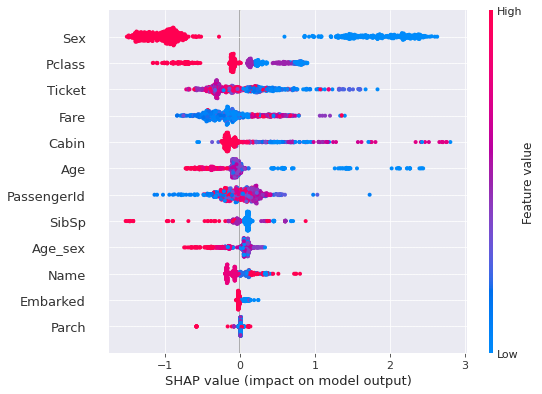

In [ ]:
shap.summary_plot(shap_values, x)

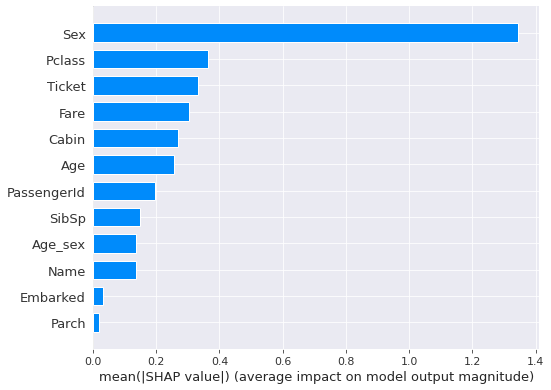

In [ ]:
shap_values = shap.TreeExplainer(gb).shap_values(x)
shap.summary_plot(shap_values, x, plot_type="bar")

결과 면에서 좋아졌다고 말할 수는 없지만, shap으로 보았을 때, 나이와 성별을 묶어준 칼럼을 보면, 모델 해석력에 도움이 되었다는 결과를 알 수 있다.

5번 문제 [중] 앙상블의 방법 중 stacking을 적용하시오.
--

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

def get_stacking_data(model, x_train, y_train, x_test, n_folds=5):
    kfold=KFold(n_splits = n_folds, random_state=42)
    
    train_fold_predict=np.zeros((x_train.shape[0], 1))
    test_predict=np.zeros((x_test.shape[0], n_folds))
    print("model :", model.__class__.__name__)
    
    for cnt, (train_index, valid_index) in enumerate(kfold.split(x_train)):
        x_train_=x_train.iloc[train_index]
        y_train_=y_train.iloc[train_index]
        x_validation=x_train.iloc[valid_index]
        
        model.fit(x_train_, y_train_)
        
        train_fold_predict[valid_index, :]=model.predict(x_validation).reshape(-1,1)
        
        test_predict[:, cnt]=model.predict(x_test)
        
    test_predict_mean=np.mean(test_predict, axis=1).reshape(-1,1)
    
    return train_fold_predict, test_predict_mean

In [ ]:
clf=LogisticRegression()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
cb = CatBoostClassifier()

In [ ]:
 clf_train,  clf_test=get_stacking_data(clf, x_train, y_train, x_test)
lgbm_train, lgbm_test=get_stacking_data(nb, x_train, y_train, x_test)
dt_train, dt_test=get_stacking_data(dt, x_train, y_train, x_test)
rf_train, rf_test=get_stacking_data(rf, x_train, y_train, x_test)
ada_train, ada_test=get_stacking_data(ada, x_train, y_train, x_test)
gb_train, gb_test=get_stacking_data(gb, x_train, y_train, x_test)
xgb_train, xgb_test=get_stacking_data(xgb, x_train, y_train, x_test)
lgbm_train, lgbm_test=get_stacking_data(lgbm, x_train, y_train, x_test)
cb_train, cb_test=get_stacking_data(cb, x_train, y_train, x_test)

In [ ]:
new_X_train=np.concatenate(( clf_train,lgbm_train,dt_train,rf_train,ada_train, gb_train,xgb_train,lgbm_train,
 cb_train), axis=1)
new_X_test=np.concatenate(( clf_test,lgbm_test,dt_test,rf_test,ada_test,
                           gb_test,xgb_test,lgbm_test,cb_test), axis=1)

In [ ]:
gb.fit(new_X_train, y_train)
y_pred=gb.predict(new_X_test)

In [ ]:
y_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
y_pred=y_pred.reshape(-1,1)
y_pred=pd.DataFrame(y_pred, columns=['Survived'])
y_pred

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
138,0
139,0
140,0
141,1
